In [1]:
import pandas as pd

df=pd.read_csv('LAB3.csv')
df.head(10)

,product,narrative
0,mortgages_and_loans,applied mortgage refinance understand process ...
1,debt_collection,received letter demanding payment medical debt...
2,debt_collection,car accident fault year old financial help use...
3,debt_collection,bad financial shape stemming bad employment si...
4,debt_collection,reliant capital solution repeatly call spouse ...
5,debt_collection,called company numerous time debt mine sent th...
6,debt_collection,mentioned debt collecting agency sent letter d...
7,credit_card,late fee accumulated nearly extra fee deferred...
8,credit_card,purchased ticket cancelled event requested ref...
9,debt_collection,national service bureau threatened jail time r...


In [2]:
df.sample(40)

,product,narrative
20778,mortgages_and_loans,several death family recently assist burial se...
47659,debt_collection,month family affected stop working due impacte...
24192,mortgages_and_loans,placed covid hardship program want affecting a...
15818,mortgages_and_loans,company fay servicing since faithfully paying ...
43229,credit_card,dentist recommended sign carecredit account pa...
41300,retail_banking,attempted buy ladder online apparently company...
37268,retail_banking,citibank personal checking account year citiba...
57912,credit_card,citibank bank issued sears credit card posted ...
40125,debt_collection,receiving call midland credit management multi...
67715,mortgages_and_loans,santander consumer usa removed account credit ...


In [3]:
df.fillna('', inplace=True)

In [4]:
df['narrative']=df['narrative'].str.replace('\s+$', '') 
df['narrative']=df['narrative'].str.replace('\s+', ' ') 
df['narrative']=df['narrative'].str.replace('[^\w\s]', '') 
df['narrative']=df['narrative'].str.replace('^\s+', '') 
df['narrative']=df['narrative'].str.lower()
df.head(20)

C:\Users\ALIENWARE M15\AppData\Local\Temp\ipykernel_26440\2179067679.py:1: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative']=df['narrative'].str.replace('\s+$', '')
C:\Users\ALIENWARE M15\AppData\Local\Temp\ipykernel_26440\2179067679.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative']=df['narrative'].str.replace('\s+', ' ')
C:\Users\ALIENWARE M15\AppData\Local\Temp\ipykernel_26440\2179067679.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative']=df['narrative'].str.replace('[^\w\s]', '')
C:\Users\ALIENWARE M15\AppData\Local\Temp\ipykernel_26440\2179067679.py:4: FutureWarning: The default value of regex will change from True to False in a future version.
  df['narrative']=df['narrative'].str.replace('^\s+', '')


,product,narrative
0,mortgages_and_loans,applied mortgage refinance understand process ...
1,debt_collection,received letter demanding payment medical debt...
2,debt_collection,car accident fault year old financial help use...
3,debt_collection,bad financial shape stemming bad employment si...
4,debt_collection,reliant capital solution repeatly call spouse ...
5,debt_collection,called company numerous time debt mine sent th...
6,debt_collection,mentioned debt collecting agency sent letter d...
7,credit_card,late fee accumulated nearly extra fee deferred...
8,credit_card,purchased ticket cancelled event requested ref...
9,debt_collection,national service bureau threatened jail time r...


In [5]:
import nltk

nltk.download('stopwords')
nltk.download('punkt')

[nltk_data] Downloading package stopwords to C:\Users\ALIENWARE
[nltk_data]     M15\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package punkt to C:\Users\ALIENWARE
[nltk_data]     M15\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [6]:
from nltk.corpus import stopwords as sw

stop=set(sw.words('english'))

df['narrative'] = df['narrative'].apply(lambda x: " ".join(x for x in x.split() if x not in stop))

In [7]:
from sklearn.feature_extraction.text import TfidfVectorizer as tv
tfidf_vec = tv()
tfidf=tfidf_vec.fit_transform(df['narrative'])

In [8]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

x_train, x_test, y_train, y_test = train_test_split(tfidf, df['product'], test_size=0.2, random_state=42)

In [9]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.model_selection import GridSearchCV
param_grid = {'max_depth': [5, 10, 15, 20], 'criterion': ['gini', 'entropy']}
grid = GridSearchCV(DecisionTreeClassifier(), param_grid, refit = True, verbose = 3)
grid.fit(x_train, y_train)
grid.best_params_
grid_predictions = grid.predict(x_test)
print("Accuracy score:", accuracy_score(y_test, grid_predictions))

Fitting 5 folds for each of 8 candidates, totalling 40 fits
[CV 1/5] END .......criterion=gini, max_depth=5;, score=0.738 total time=   3.8s
[CV 2/5] END .......criterion=gini, max_depth=5;, score=0.739 total time=   3.7s
[CV 3/5] END .......criterion=gini, max_depth=5;, score=0.736 total time=   3.7s
[CV 4/5] END .......criterion=gini, max_depth=5;, score=0.742 total time=   3.7s
[CV 5/5] END .......criterion=gini, max_depth=5;, score=0.734 total time=   3.7s
[CV 1/5] END ......criterion=gini, max_depth=10;, score=0.784 total time=   9.0s
[CV 2/5] END ......criterion=gini, max_depth=10;, score=0.787 total time=   9.0s
[CV 3/5] END ......criterion=gini, max_depth=10;, score=0.786 total time=   8.9s
[CV 4/5] END ......criterion=gini, max_depth=10;, score=0.788 total time=   8.9s
[CV 5/5] END ......criterion=gini, max_depth=10;, score=0.784 total time=   8.7s
[CV 1/5] END ......criterion=gini, max_depth=15;, score=0.806 total time=  16.7s
[CV 2/5] END ......criterion=gini, max_depth=15;,

In [10]:
from sklearn.metrics import confusion_matrix

cm_dt = confusion_matrix(y_test, grid_predictions)
print(cm_dt)

[[2276  335  145  283]
 [ 202 4123  271   81]
 [ 143  384 3118  100]
 [ 327  241  135 2085]]


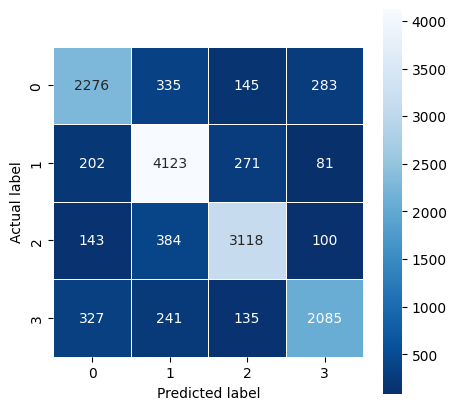

In [11]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(5,5))
sns.heatmap(cm_dt, annot=True, fmt="d", linewidths=.5, square = True, cmap = 'Blues_r')
plt.ylabel('Actual label')
plt.xlabel('Predicted label')
plt.show()

In [12]:
from sklearn.metrics import classification_report as cr
print(cr(y_test, grid_predictions))

                     precision    recall  f1-score   support

        credit_card       0.77      0.75      0.76      3039
    debt_collection       0.81      0.88      0.84      4677
mortgages_and_loans       0.85      0.83      0.84      3745
     retail_banking       0.82      0.75      0.78      2788

           accuracy                           0.81     14249
          macro avg       0.81      0.80      0.81     14249
       weighted avg       0.81      0.81      0.81     14249

